# CITS4403 - P2P Modelling

This notebook demonstrates a complex P2P model using agent gossip protocols (GNUTELLA-like) and graph-theory.

## Steps to Run
1. Run all cells sequentially.

In [1]:
import sys, os, pathlib
project_root = pathlib.Path.cwd().parent
sys.path.insert(0, str(project_root))
from src.graph import nxgraph
import src.agent as agent
from utils.plotter import draw_graph, draw_gossip_step_by_step, start_new_run, create_round_gif
#from utils.simulator_old import get_network_stats, reset_simulation
from utils.simulator_new import simulate_round_agent_driven, get_network_stats, reset_simulation
from widgets.graph_widget import display_graph_widgets, get_graph, is_graph_generated
from widgets.init_widget import display_init_widgets, set_graph_data
from widgets.scenario_widget import display_scenario_widgets
from widgets.simulation_widget import display_simulation_widgets

import ipywidgets as widgets
from IPython.display import display, clear_output


Below is the code for topologic comparison between BA, and ER graph

Generating BA Graph

BA_graph (m=1)


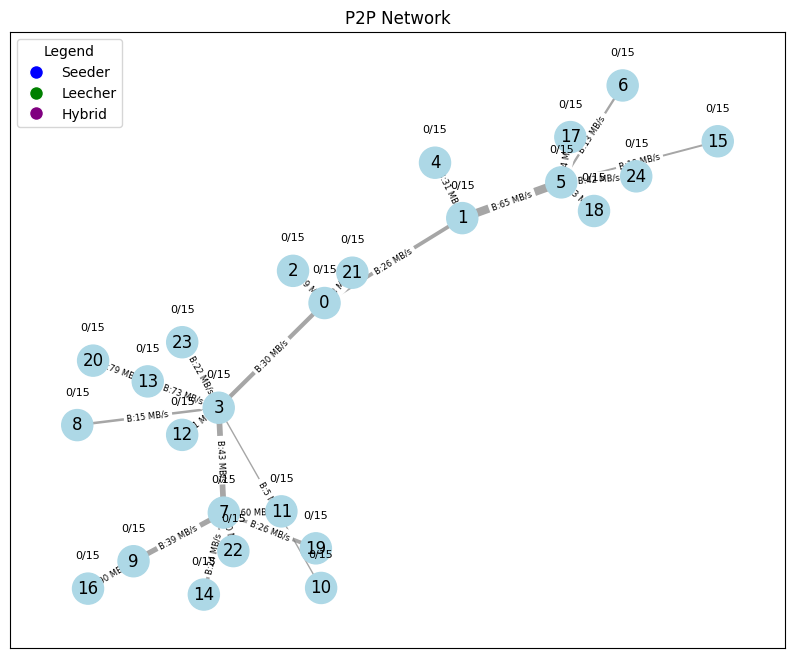

Average cluster coefficient: 0.0
Average path length: 3.51
Number of edges: 24
Generating BA Graph

BA_graph (m=2)


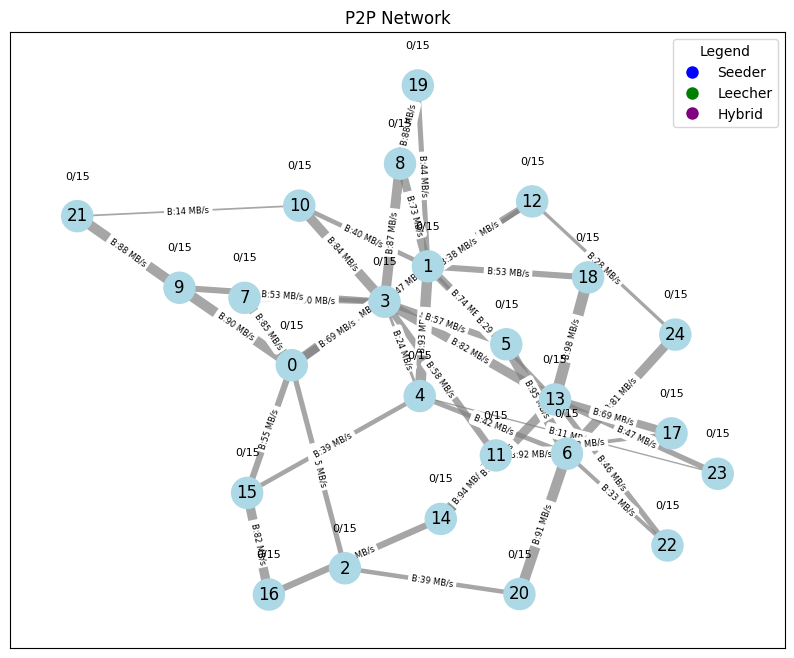

Average cluster coefficient: 0.23
Average path length: 2.37
Number of edges: 46
Generating BA Graph

BA_graph (m=3)


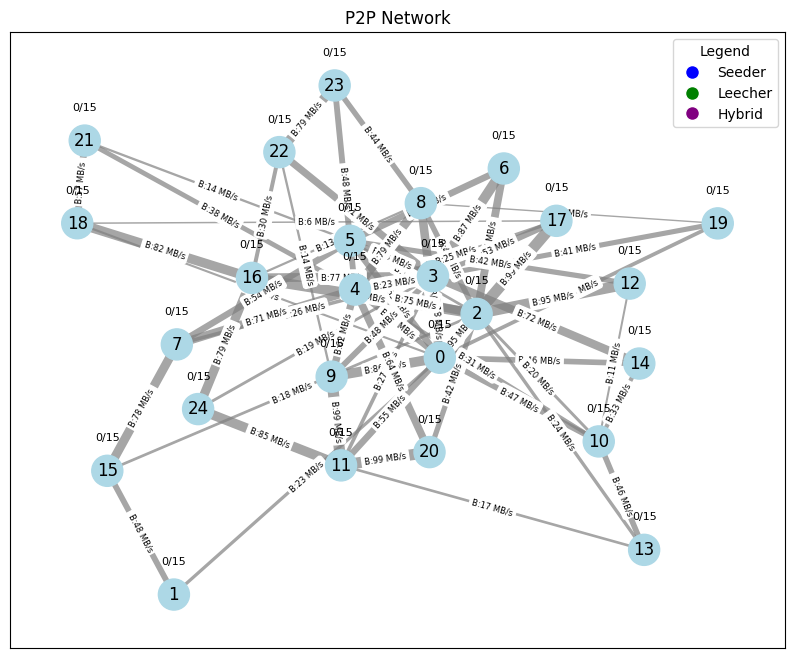

Average cluster coefficient: 0.33
Average path length: 1.95
Number of edges: 66
Generating BA Graph

BA_graph (m=4)


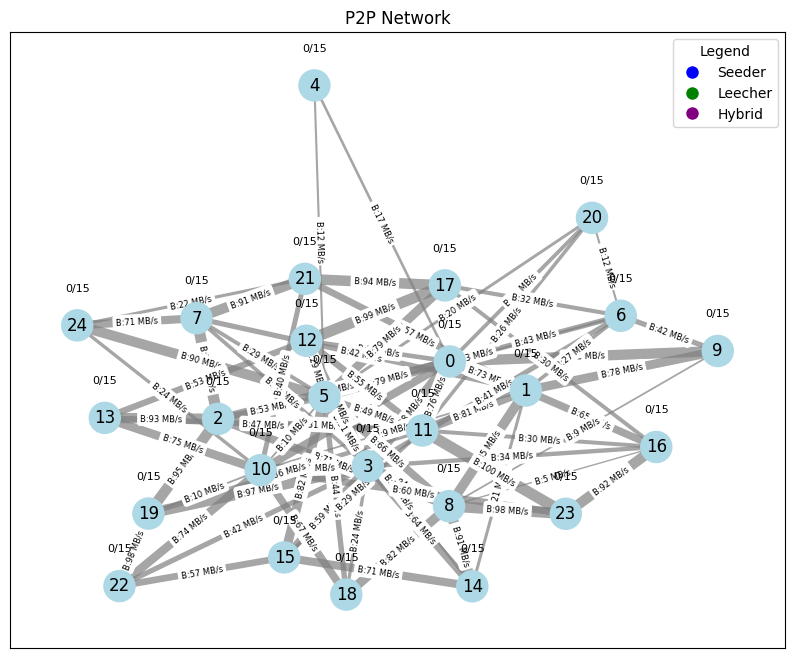

Average cluster coefficient: 0.45
Average path length: 1.79
Number of edges: 84
Generating ER graph

ER_graph (matched to BA avg_deg=1.92)


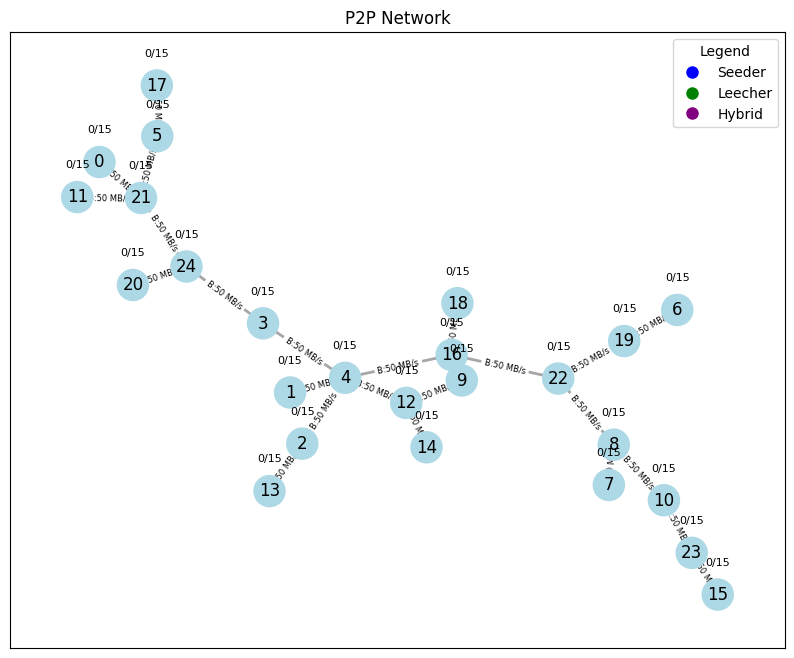

Average cluster coefficient: 0.0
Average path length: 4.51
Number of edges: 24
Generating ER graph

ER_graph (matched to BA avg_deg=3.68)


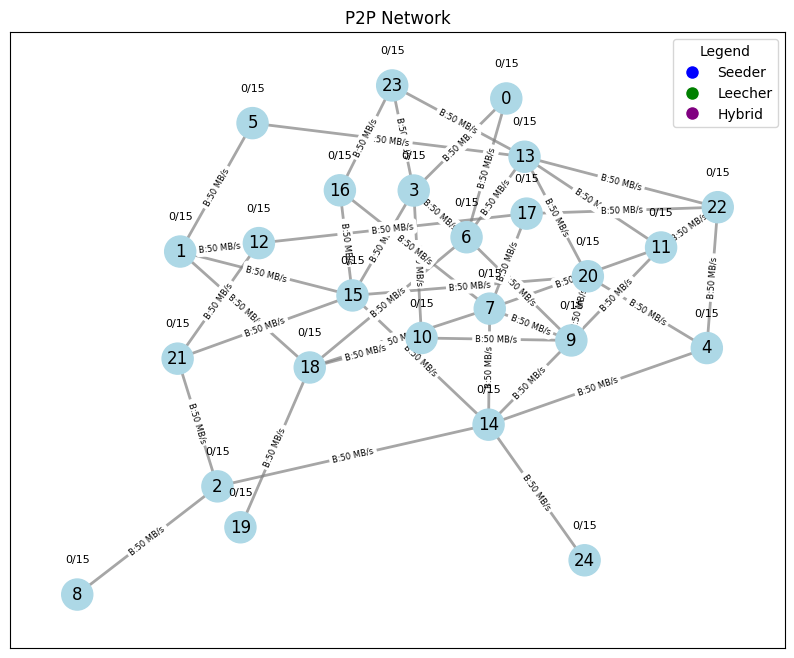

Average cluster coefficient: 0.08
Average path length: 2.47
Number of edges: 46
Generating ER graph

ER_graph (matched to BA avg_deg=5.28)


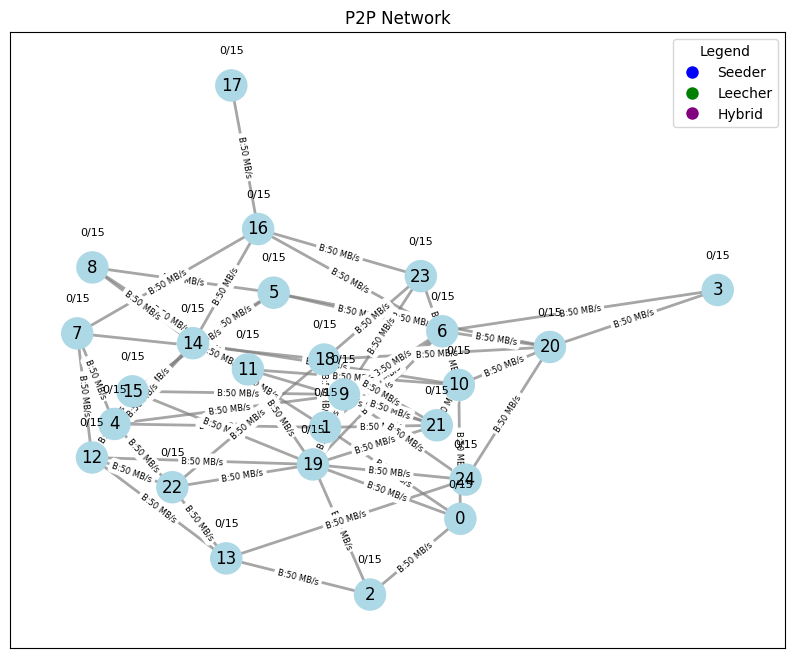

Average cluster coefficient: 0.25
Average path length: 2.06
Number of edges: 66
Generating ER graph

ER_graph (matched to BA avg_deg=6.72)


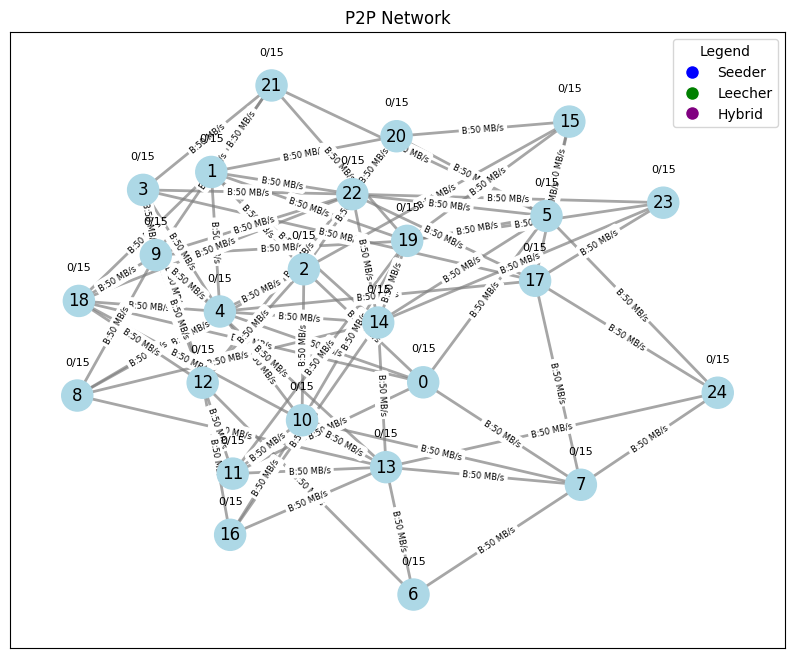

Average cluster coefficient: 0.29
Average path length: 1.81
Number of edges: 84
[{'graph': <networkx.classes.graph.Graph object at 0x0000029DBE5F9FD0>, 'avg_degree': 1.92, 'clustering_coefficient': 0.0, 'average_path_length': 3.51, 'num_nodes': 25, 'num_edges': 24}, {'graph': <networkx.classes.graph.Graph object at 0x0000029DBE812E40>, 'avg_degree': 3.68, 'clustering_coefficient': 0.23, 'average_path_length': 2.37, 'num_nodes': 25, 'num_edges': 46}, {'graph': <networkx.classes.graph.Graph object at 0x0000029DC08E0A40>, 'avg_degree': 5.28, 'clustering_coefficient': 0.33, 'average_path_length': 1.95, 'num_nodes': 25, 'num_edges': 66}, {'graph': <networkx.classes.graph.Graph object at 0x0000029DC0910C80>, 'avg_degree': 6.72, 'clustering_coefficient': 0.45, 'average_path_length': 1.79, 'num_nodes': 25, 'num_edges': 84}]


In [2]:
# refactored code of above, storing data with dictionary
from src.graph import nxgraph
from utils.plotter import draw_graph
from src.analytics import clustering_co, path_length

# Parameters, lower_ut = upper_ut effectively means graph is unweighted / uniformly weighted
node = 25
seed = 69
lower_ut = 50
upper_ut = 50
FILE_PIECES = 15
G = nxgraph()

# Unified storage
graph_data = {
    'BA': [],
    'ER': []
}

# Generate BA graphs and store metrics
for m in range(1, 5):
    ba = G.BA_graph(
        nodes=node,
        edges=m,
        seed=seed,
        weighted=True,
        lower_ut=lower_ut,
        upper_ut=upper_ut
    )

    avg_deg = sum(dict(ba.degree()).values()) / ba.number_of_nodes()
    cluster = round(clustering_co(ba), 2)
    path_L = round(path_length(ba), 2)
    edge_count = ba.number_of_edges()
    node_count = ba.number_of_nodes()

    graph_data['BA'].append({
        'graph': ba,
        'avg_degree': avg_deg,
        'clustering_coefficient': cluster,
        'average_path_length': path_L,
        'num_nodes': node_count,
        'num_edges': edge_count
    })

    print(f"\nBA_graph (m={m})")
    draw_graph(ba, edge_labels=None, total_pieces=FILE_PIECES)
    print(f"Average cluster coefficient: {cluster}")
    print(f"Average path length: {path_L}")
    print(f"Number of edges: {edge_count}")

# Generate ER graphs based on BA average degree
for ba_info in graph_data['BA']:
    avg_deg = ba_info['avg_degree']
    edge_count = int(node * avg_deg / 2)

    er = G.ER_Graph_nm(
        nodes=node,
        edges=edge_count,
        weighted=True,
        seed=seed,
        lower_ut=lower_ut,
        upper_ut=upper_ut
    )

    cluster = round(clustering_co(er), 2)
    path_L = round(path_length(er), 2)
    node_count = er.number_of_nodes()

    graph_data['ER'].append({
        'graph': er,
        'avg_degree': avg_deg,
        'clustering_coefficient': cluster,
        'average_path_length': path_L,
        'num_nodes': node_count,
        'num_edges': edge_count
    })

    print(f"\nER_graph (matched to BA avg_deg={round(avg_deg,2)})")
    draw_graph(er, edge_labels=None, total_pieces=FILE_PIECES)
    print(f"Average cluster coefficient: {cluster}")
    print(f"Average path length: {path_L}")
    print(f"Number of edges: {edge_count}")

print(graph_data['BA'])

Below is the code for scalability test

In [ ]:
# refactored code
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Scenario parameters
seed             = 69
edges_m          = 2
lower_ut         = 50
upper_ut         = 50
FILE_PIECES      = 15

n_seeders        = 1
sim_seed         = seed
search_mode      = 'Realistic'
neighbor_selection = 'Random'
ttl              = 5
cleanup_queries  = True
single_agent     = 0
save_images      = False
visualize_output = True
output_area      = widgets.Output()

G = nxgraph()

# Using a dictionary to store generated data
scal_test_graph_data = {
    'BA': [],
    'ER': []
}

# Generating BA graph
for n in range(10, 160, 20):
    ba = G.BA_graph(
        nodes    = n,
        edges    = edges_m,
        seed     = seed,
        weighted = True,
        lower_ut = lower_ut,
        upper_ut = upper_ut
    )

    node_count = ba.number_of_nodes()
    edge_count = ba.number_of_edges()
    avg_deg    = sum(dict(ba.degree()).values()) / node_count
    cluster    = round(clustering_co(ba), 2)
    path_L     = round(path_length(ba), 2)
    max_rounds = int(round(1.25 * n + 35, 0))

    scal_test_graph_data['BA'].append({
        'graph'                 : ba,
        'num_nodes'             : node_count,
        'num_edges'             : edge_count,
        'avg_degree'            : avg_deg,
        'clustering_coefficient': cluster,
        'average_path_length'   : path_L,
        'max_rounds'            : max_rounds,
        'total_queries'         : 0,
        'total_hits'            : 0,
        'total_transfers'       : 0
    })

    print(f"\nBA_graph n={n}, m={edges_m}")
    draw_graph(ba, edge_labels=None, total_pieces=FILE_PIECES)
    print(f"  | avg_deg={avg_deg:.2f}, C={cluster}, L={path_L}, edges={edge_count}")

# Generating ER graph
for ba_rec in scal_test_graph_data['BA']:
    n       = ba_rec['num_nodes']
    avg_deg = ba_rec['avg_degree']
    m_er    = int(n * avg_deg / 2)

    er = G.ER_Graph_nm(
        nodes    = n,
        edges    = m_er,
        weighted = True,
        seed     = seed,
        lower_ut = lower_ut,
        upper_ut = upper_ut
    )

    node_count = er.number_of_nodes()
    edge_count = er.number_of_edges()
    cluster    = round(clustering_co(er), 2)
    path_L     = round(path_length(er), 2)
    max_rounds = ba_rec['max_rounds']  # reuse same TTL logic

    scal_test_graph_data['ER'].append({
        'graph'                 : er,
        'num_nodes'             : node_count,
        'num_edges'             : edge_count,
        'avg_degree'            : avg_deg,
        'clustering_coefficient': cluster,
        'average_path_length'   : path_L,
        'max_rounds'            : max_rounds,
        'total_queries'         : 0,
        'total_hits'            : 0,
        'total_transfers'       : 0
    })

    print(f"\nER_graph n={n}, m≈{m_er}")
    draw_graph(er, edge_labels=None, total_pieces=FILE_PIECES)
    print(f"  | avg_deg={avg_deg:.2f}, C={cluster}, L={path_L}, edges={edge_count}")

# nested for loop for BA and ER
for kind in ('BA', 'ER'):
    for rec in scal_test_graph_data[kind]:
        Gk       = rec['graph']
        rounds   = rec['max_rounds']
        rec_q    = 0
        rec_h    = 0
        rec_t    = 0

        # initialise simulation
        set_graph_data(Gk, FILE_PIECES)
        agent.assign_n_seeders(Gk, n=n_seeders, seed=sim_seed)
        agent.initialize_file_sharing(
            Gk, FILE_PIECES,
            seed              = sim_seed,
            distribution_type = 'n_seeders',
            n_seeders         = n_seeders
        )

        # simulating
        for r in range(1, rounds + 1):
            result = simulate_round_agent_driven(
                Gk,
                FILE_PIECES,
                seed                    = sim_seed+r,
                cleanup_completed_queries=cleanup_queries,
                search_mode             = search_mode,
                current_round           = r,
                neighbor_selection      = neighbor_selection,
                single_agent            = (single_agent or None)
            )

            queries, hits, _ = result['message_rounds']
            transfers       = result['transfers']

            rec_q += len(queries)
            rec_h += len(hits)
            rec_t += len(transfers)
            stats = get_network_stats(Gk, FILE_PIECES)
            print(f"\n{kind} n={rec['num_nodes']} → Queries = {rec_q}, Hits = {rec_h}, Transfers = {rec_t}, Current round = {r}")
            print(f"Seeders: {stats['seeders']}")
            print(f"Leechers: {stats['leechers']} (incomplete: {stats['incomplete_leechers']})")
            print(f"Hybrids: {stats['hybrids']} (incomplete: {stats['incomplete_hybrids']})")
            print(f"Total pieces in network: {stats['total_pieces_in_network']}")
            print('about to go into stats')
            if stats['completion_rate'] >= 1.0:
                print(f"\nAll nodes have all pieces in {r} rounds")
                break

        rec['total_queries']   = rec_q
        rec['total_hits']      = rec_h
        rec['total_transfers'] = rec_t

        print(f"\n{kind} n={rec['num_nodes']} → Queries = {rec_q}, Hits = {rec_h}, Transfers = {rec_t}")
        
        draw_gossip_step_by_step(Gk, result['message_rounds'], result['transfers'], 
                            FILE_PIECES, r, save_images=False, 
                            max_ttl=ttl, show_debug_info=False)

# evaluation of results
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)
for row, kind in enumerate(('BA', 'ER')):
    recs      = scal_test_graph_data[kind]
    nodes     = [r['num_nodes']       for r in recs]
    queries   = [r['total_queries']   for r in recs]
    hits      = [r['total_hits']      for r in recs]
    transfers = [r['total_transfers'] for r in recs]

    axes[row][0].plot(nodes, queries, marker='o')
    axes[row][0].set_title(f"{kind}: Queries vs Nodes")
    axes[row][1].plot(nodes, hits, marker='s', color='green')
    axes[row][1].set_title(f"{kind}: Hits vs Nodes")
    axes[row][2].plot(nodes, transfers, marker='^', color='red')
    axes[row][2].set_title(f"{kind}: Transfers vs Nodes")

for ax in axes.flat:
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

The following code is testing weighted vs unweighted graphs. To run the code, simply run the very first cell, then run this cell.

Generating BA Graph

BA_graph n=20, m=1


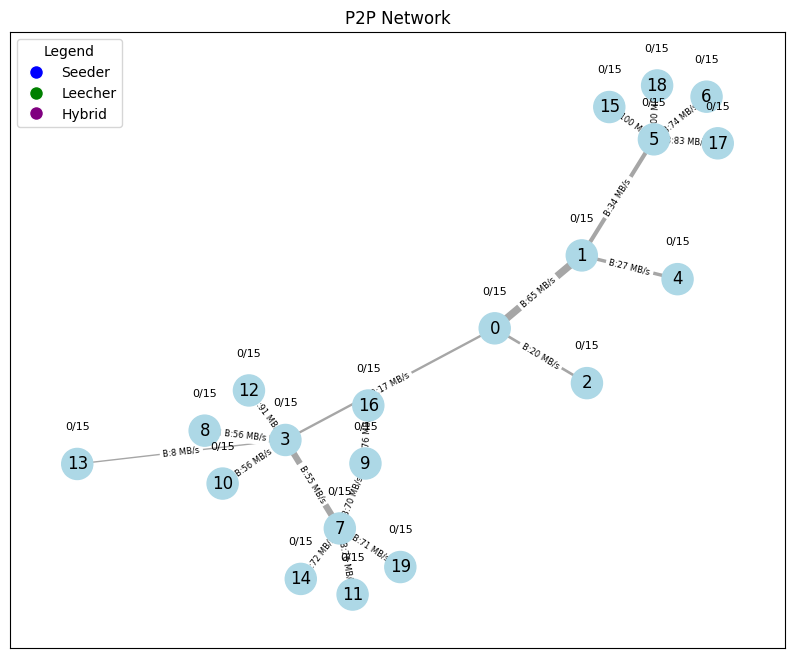

  | avg_deg=1.90, C=0.0, L=3.43, edges=19
Generating BA Graph

BA_graph n=20, m=2


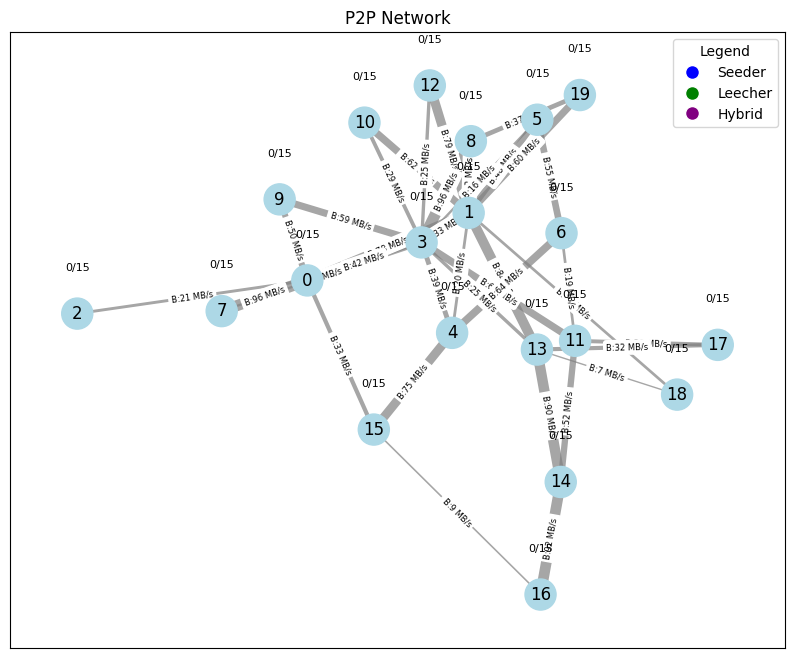

  | avg_deg=3.60, C=0.4, L=2.21, edges=36
Generating BA Graph

BA_graph n=20, m=3


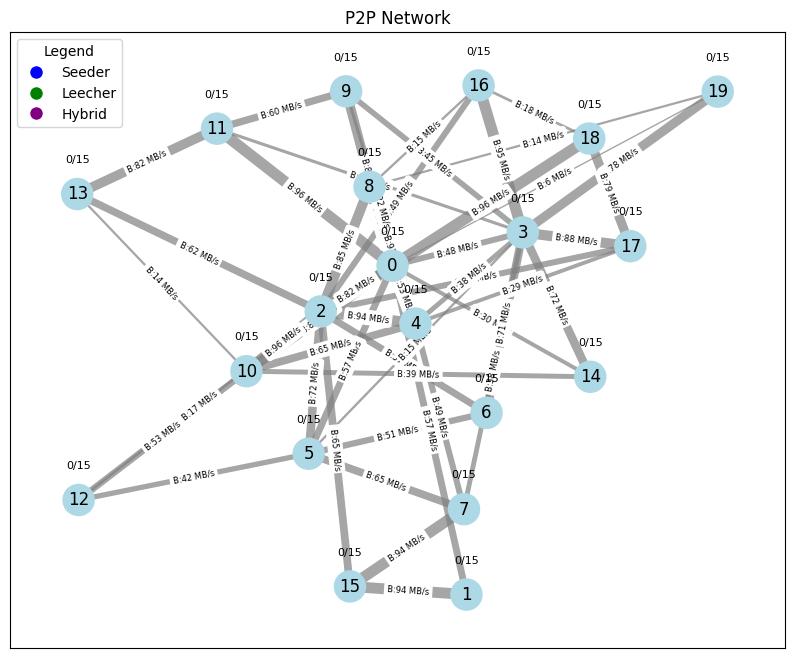

  | avg_deg=5.10, C=0.38, L=1.83, edges=51
Generating BA Graph

BA_graph n=20, m=4


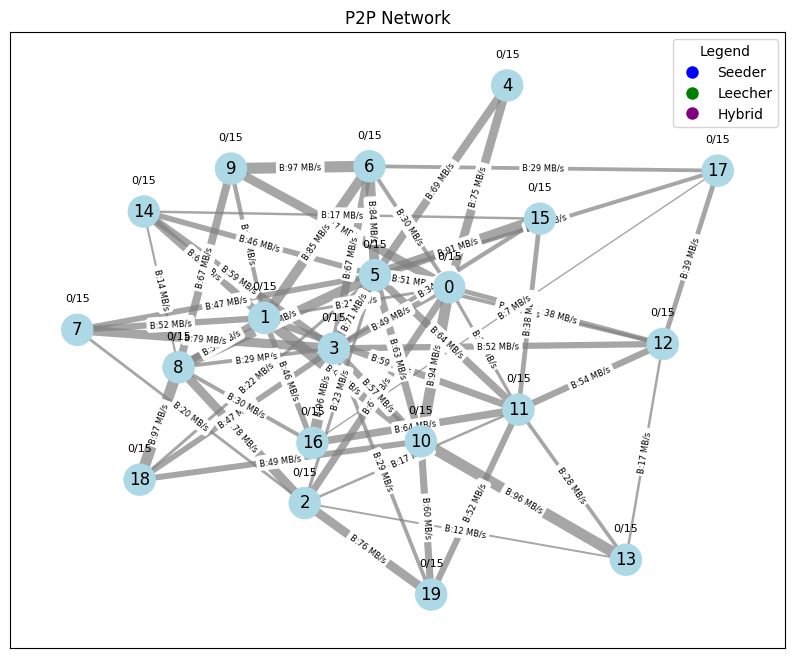

  | avg_deg=6.40, C=0.44, L=1.71, edges=64
Generating ER graph

ER_graph n=20, m=19


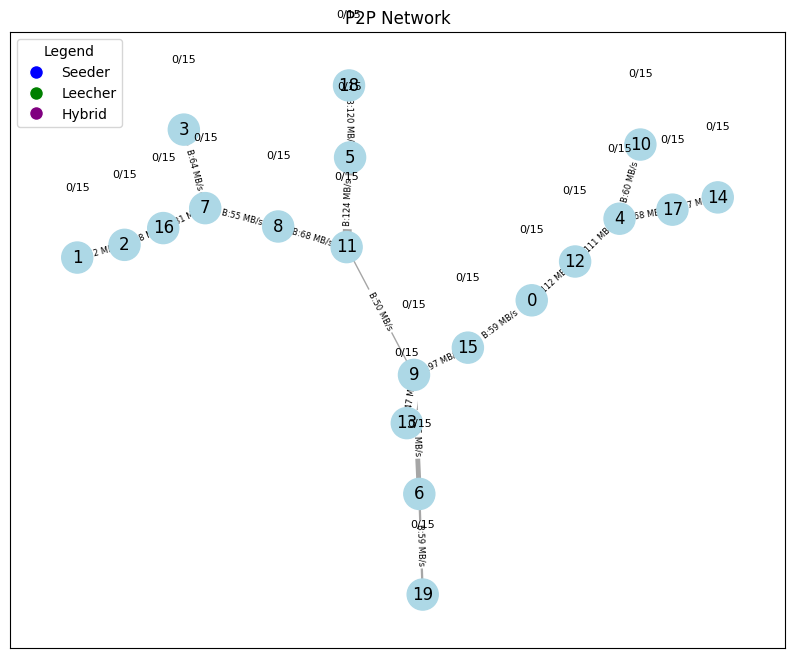

  | avg_deg=1.90, C=0.0, L=4.74, edges=19
Generating ER graph

ER_graph n=20, m=36


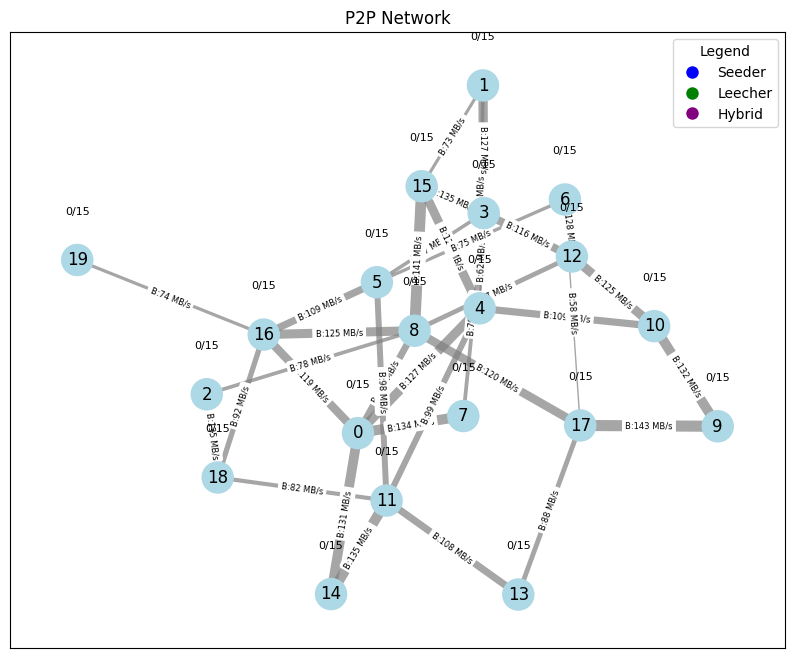

  | avg_deg=3.60, C=0.11, L=2.24, edges=36
Generating ER graph

ER_graph n=20, m=51


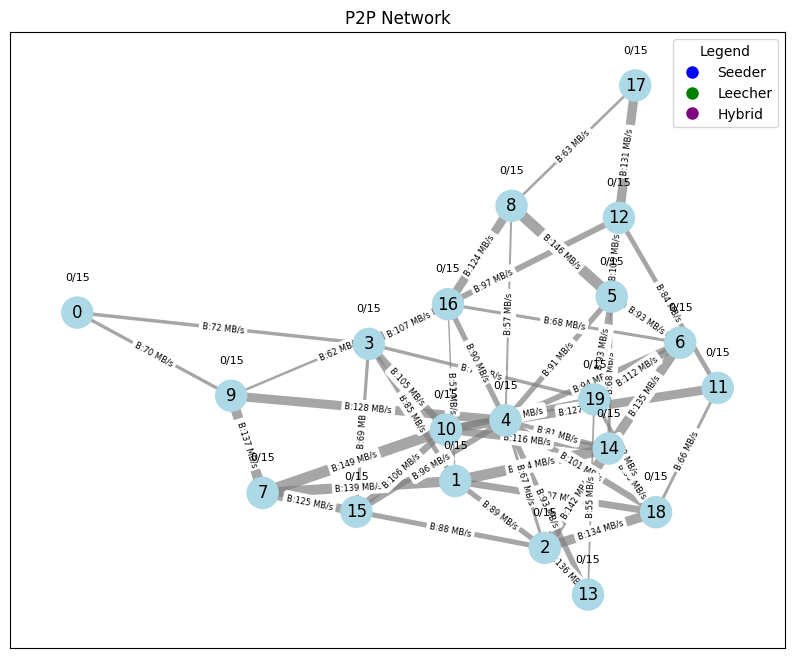

  | avg_deg=5.10, C=0.23, L=1.92, edges=51
Generating ER graph

ER_graph n=20, m=64


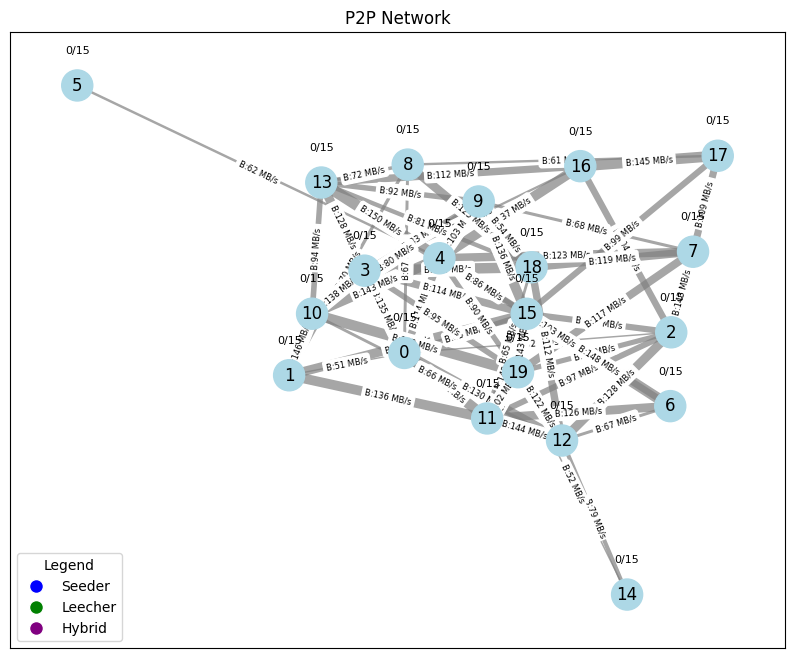

  | avg_deg=6.40, C=0.36, L=1.77, edges=64

BA n=20 → Queries = 0, Hits = 0, Transfers = 0, Current round = 0
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 9, Hits = 0, Transfers = 0, Current round = 1
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 36, Hits = 0, Transfers = 0, Current round = 2
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 87, Hits = 2, Transfers = 1, Current round = 3
Seeders: 1
Leechers: 18 (incomplete: 18)
Hybrids: 1 (incomplete: 1)
Total pieces in network: 16
about to go into stats

BA n=20 → Queries = 158, Hits = 6, Transfers = 2, Current round = 4
Seeders: 1
Leechers: 17 (incomplete: 17)
Hybrids: 2 (incomplete: 2)
Total pieces in network: 17
about to go into stats

BA n=20 → Queries = 22

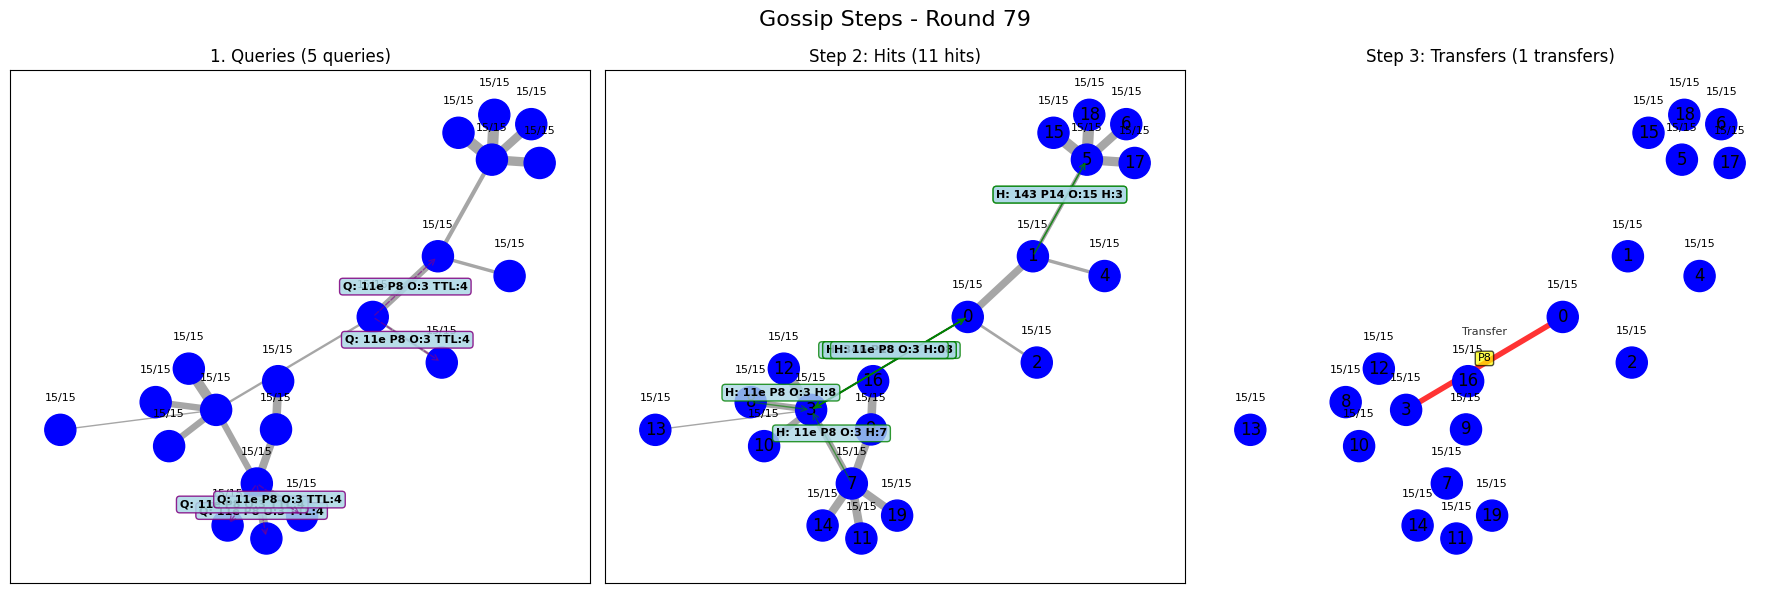


BA n=20 → Queries = 0, Hits = 0, Transfers = 0, Current round = 0
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 17, Hits = 0, Transfers = 0, Current round = 1
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 69, Hits = 2, Transfers = 2, Current round = 2
Seeders: 1
Leechers: 17 (incomplete: 17)
Hybrids: 2 (incomplete: 2)
Total pieces in network: 17
about to go into stats

BA n=20 → Queries = 197, Hits = 9, Transfers = 5, Current round = 3
Seeders: 1
Leechers: 15 (incomplete: 15)
Hybrids: 4 (incomplete: 4)
Total pieces in network: 20
about to go into stats

BA n=20 → Queries = 388, Hits = 20, Transfers = 14, Current round = 4
Seeders: 1
Leechers: 6 (incomplete: 6)
Hybrids: 13 (incomplete: 13)
Total pieces in network: 29
about to go into stats

BA n=20 → Queries = 566, Hits = 28, Transfers = 17, Current r

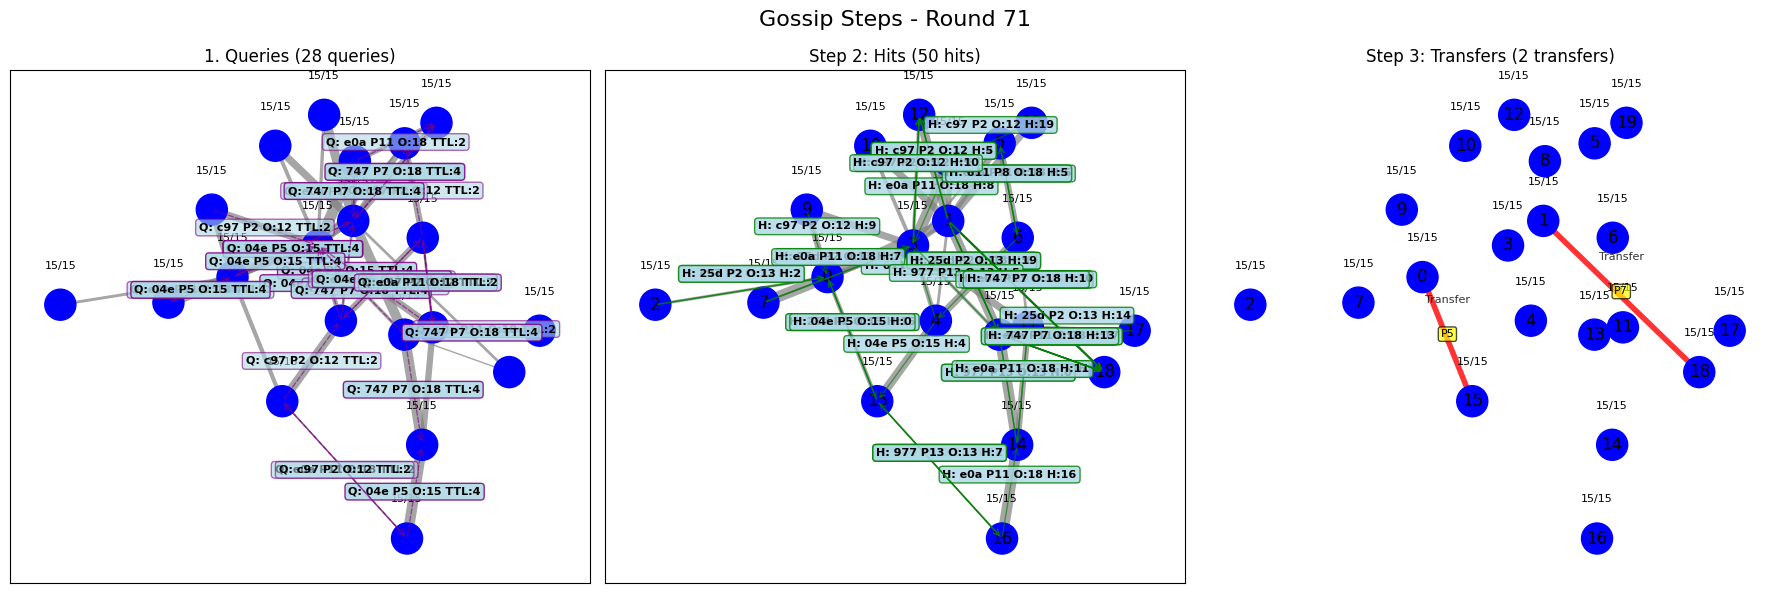


BA n=20 → Queries = 0, Hits = 0, Transfers = 0, Current round = 0
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 9, Hits = 0, Transfers = 0, Current round = 1
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 53, Hits = 0, Transfers = 0, Current round = 2
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 164, Hits = 0, Transfers = 0, Current round = 3
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 361, Hits = 3, Transfers = 0, Current round = 4
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 621, Hits = 9, Transfers = 3, Current round 

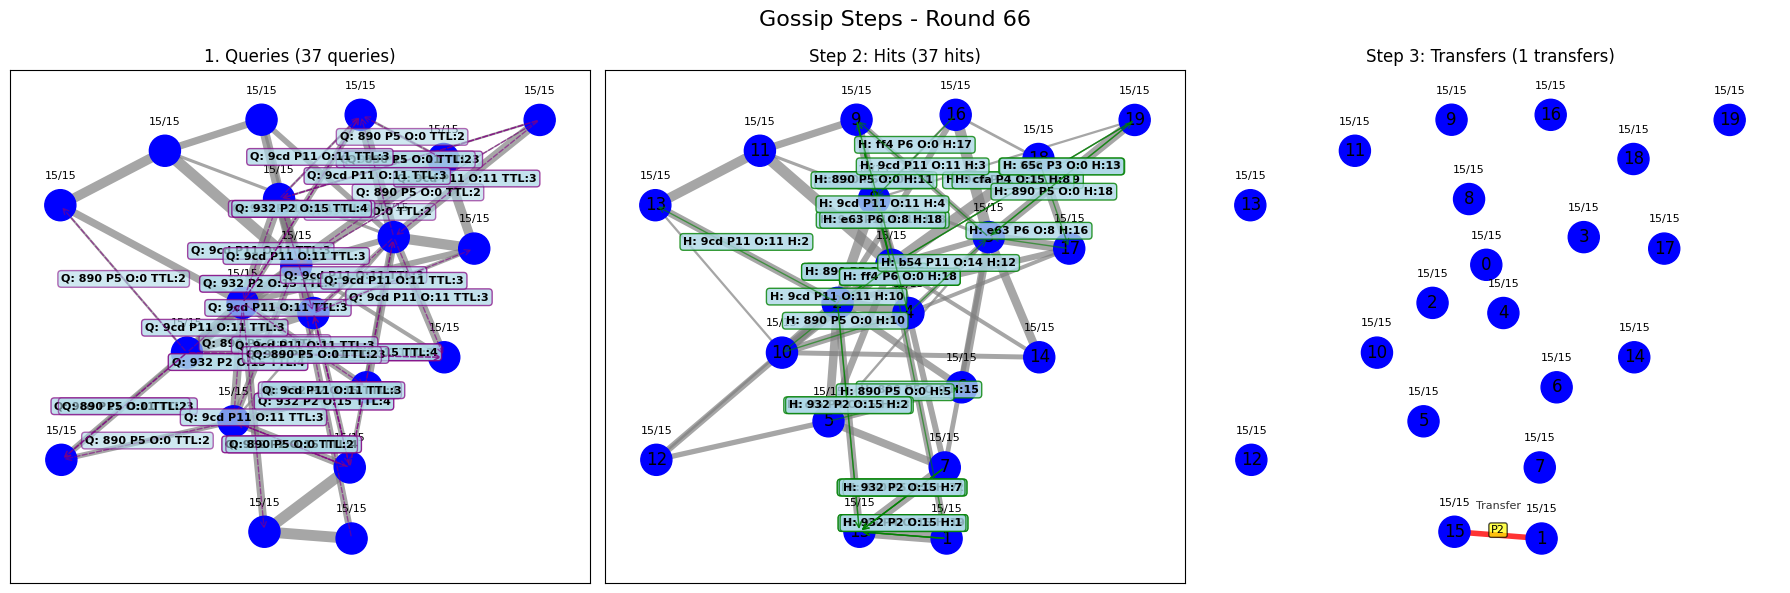


BA n=20 → Queries = 0, Hits = 0, Transfers = 0, Current round = 0
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 9, Hits = 0, Transfers = 0, Current round = 1
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 57, Hits = 0, Transfers = 0, Current round = 2
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

BA n=20 → Queries = 203, Hits = 4, Transfers = 1, Current round = 3
Seeders: 1
Leechers: 18 (incomplete: 18)
Hybrids: 1 (incomplete: 1)
Total pieces in network: 16
about to go into stats

BA n=20 → Queries = 458, Hits = 14, Transfers = 6, Current round = 4
Seeders: 1
Leechers: 13 (incomplete: 13)
Hybrids: 6 (incomplete: 6)
Total pieces in network: 21
about to go into stats

BA n=20 → Queries = 777, Hits = 21, Transfers = 12, Current rou

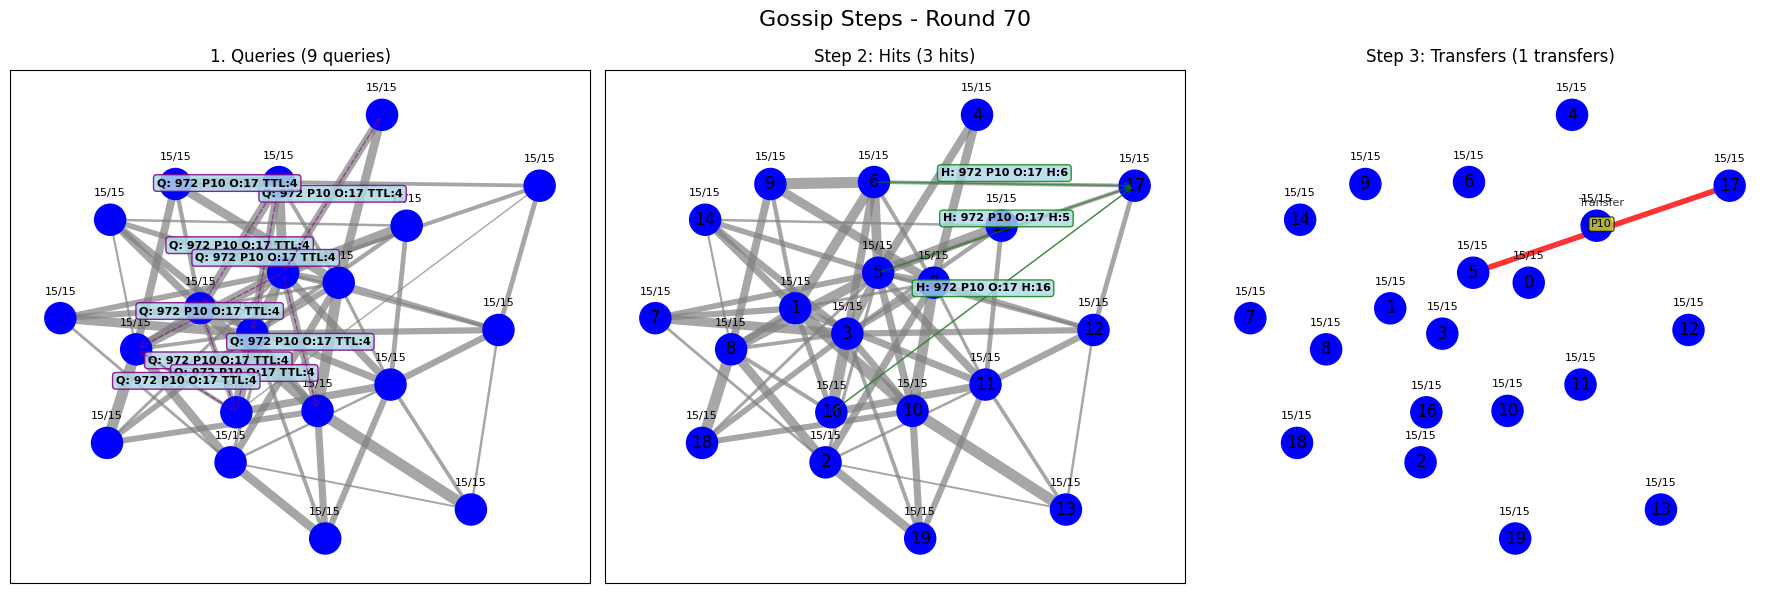


ER n=20 → Queries = 0, Hits = 0, Transfers = 0, Current round = 0
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 4, Hits = 0, Transfers = 0, Current round = 1
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 16, Hits = 1, Transfers = 1, Current round = 2
Seeders: 1
Leechers: 18 (incomplete: 18)
Hybrids: 1 (incomplete: 1)
Total pieces in network: 16
about to go into stats

ER n=20 → Queries = 36, Hits = 2, Transfers = 2, Current round = 3
Seeders: 1
Leechers: 18 (incomplete: 18)
Hybrids: 1 (incomplete: 1)
Total pieces in network: 17
about to go into stats

ER n=20 → Queries = 71, Hits = 2, Transfers = 2, Current round = 4
Seeders: 1
Leechers: 18 (incomplete: 18)
Hybrids: 1 (incomplete: 1)
Total pieces in network: 17
about to go into stats

ER n=20 → Queries = 125, Hits = 3, Transfers = 2, Current round = 

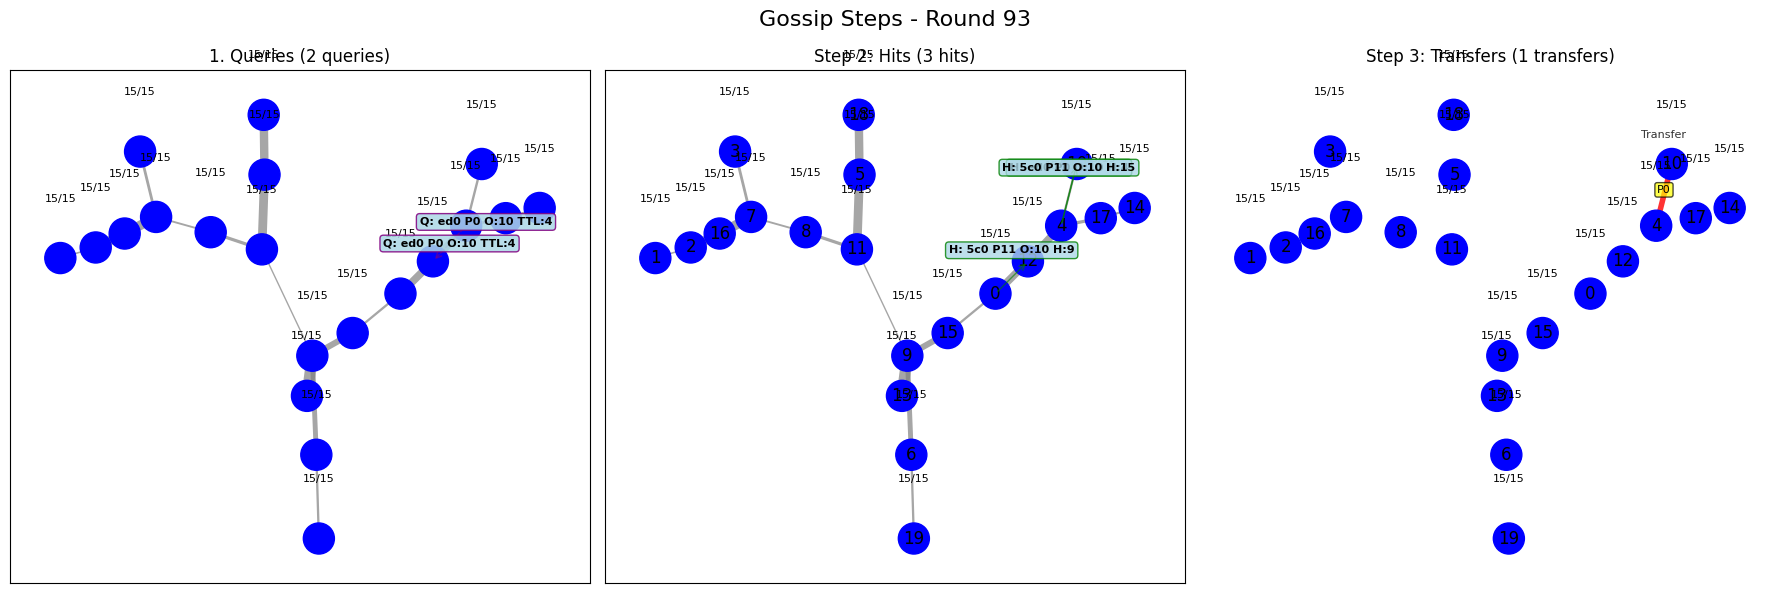


ER n=20 → Queries = 0, Hits = 0, Transfers = 0, Current round = 0
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 16, Hits = 0, Transfers = 0, Current round = 1
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 66, Hits = 0, Transfers = 0, Current round = 2
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 191, Hits = 3, Transfers = 0, Current round = 3
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 405, Hits = 8, Transfers = 3, Current round = 4
Seeders: 1
Leechers: 16 (incomplete: 16)
Hybrids: 3 (incomplete: 3)
Total pieces in network: 18
about to go into stats

ER n=20 → Queries = 640, Hits = 17, Transfers = 4, Current roun

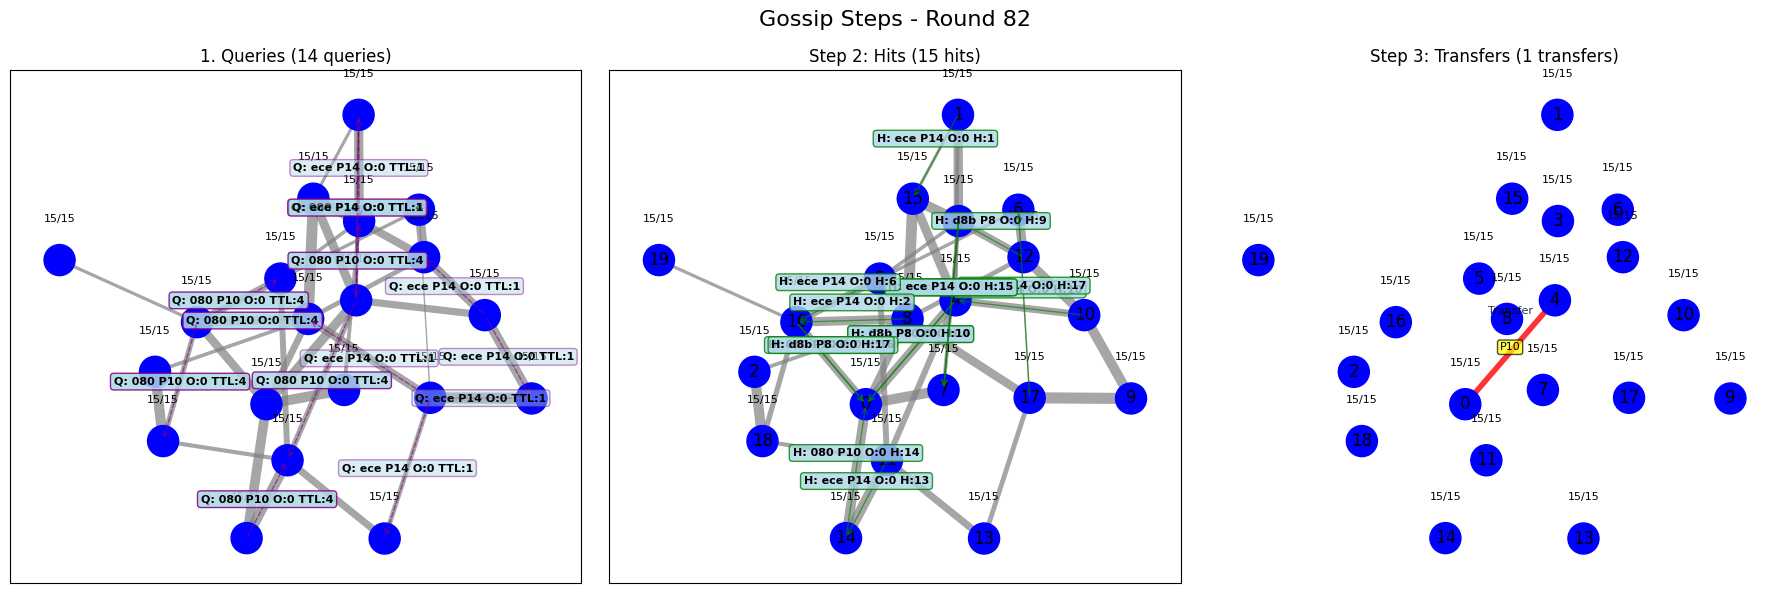


ER n=20 → Queries = 0, Hits = 0, Transfers = 0, Current round = 0
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 8, Hits = 0, Transfers = 0, Current round = 1
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 43, Hits = 1, Transfers = 1, Current round = 2
Seeders: 1
Leechers: 18 (incomplete: 18)
Hybrids: 1 (incomplete: 1)
Total pieces in network: 16
about to go into stats

ER n=20 → Queries = 153, Hits = 2, Transfers = 1, Current round = 3
Seeders: 1
Leechers: 18 (incomplete: 18)
Hybrids: 1 (incomplete: 1)
Total pieces in network: 16
about to go into stats

ER n=20 → Queries = 386, Hits = 7, Transfers = 4, Current round = 4
Seeders: 1
Leechers: 16 (incomplete: 16)
Hybrids: 3 (incomplete: 3)
Total pieces in network: 19
about to go into stats

ER n=20 → Queries = 711, Hits = 19, Transfers = 7, Current round

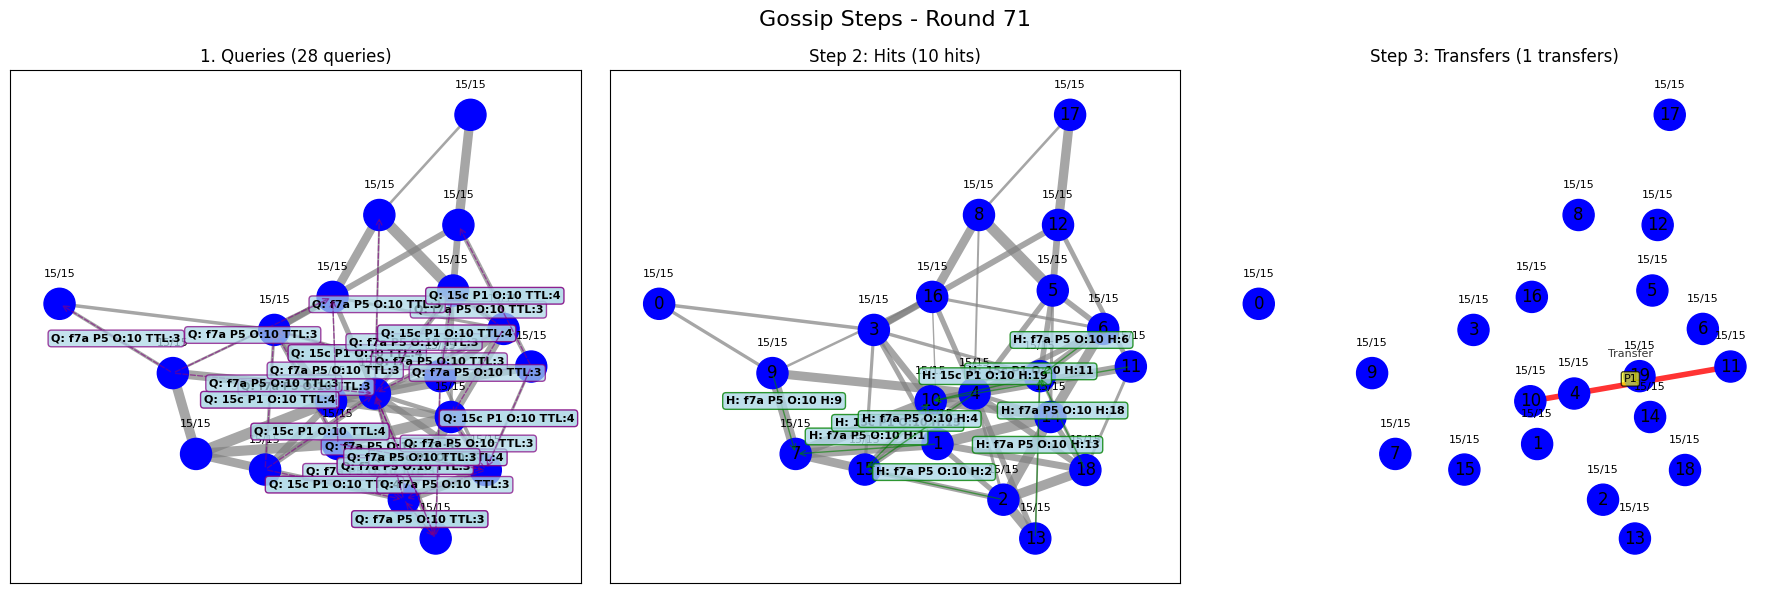


ER n=20 → Queries = 0, Hits = 0, Transfers = 0, Current round = 0
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 12, Hits = 0, Transfers = 0, Current round = 1
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 58, Hits = 0, Transfers = 0, Current round = 2
Seeders: 1
Leechers: 19 (incomplete: 19)
Hybrids: 0 (incomplete: 0)
Total pieces in network: 15
about to go into stats

ER n=20 → Queries = 191, Hits = 3, Transfers = 1, Current round = 3
Seeders: 1
Leechers: 18 (incomplete: 18)
Hybrids: 1 (incomplete: 1)
Total pieces in network: 16
about to go into stats

ER n=20 → Queries = 437, Hits = 6, Transfers = 3, Current round = 4
Seeders: 1
Leechers: 16 (incomplete: 16)
Hybrids: 3 (incomplete: 3)
Total pieces in network: 18
about to go into stats

ER n=20 → Queries = 779, Hits = 14, Transfers = 4, Current roun

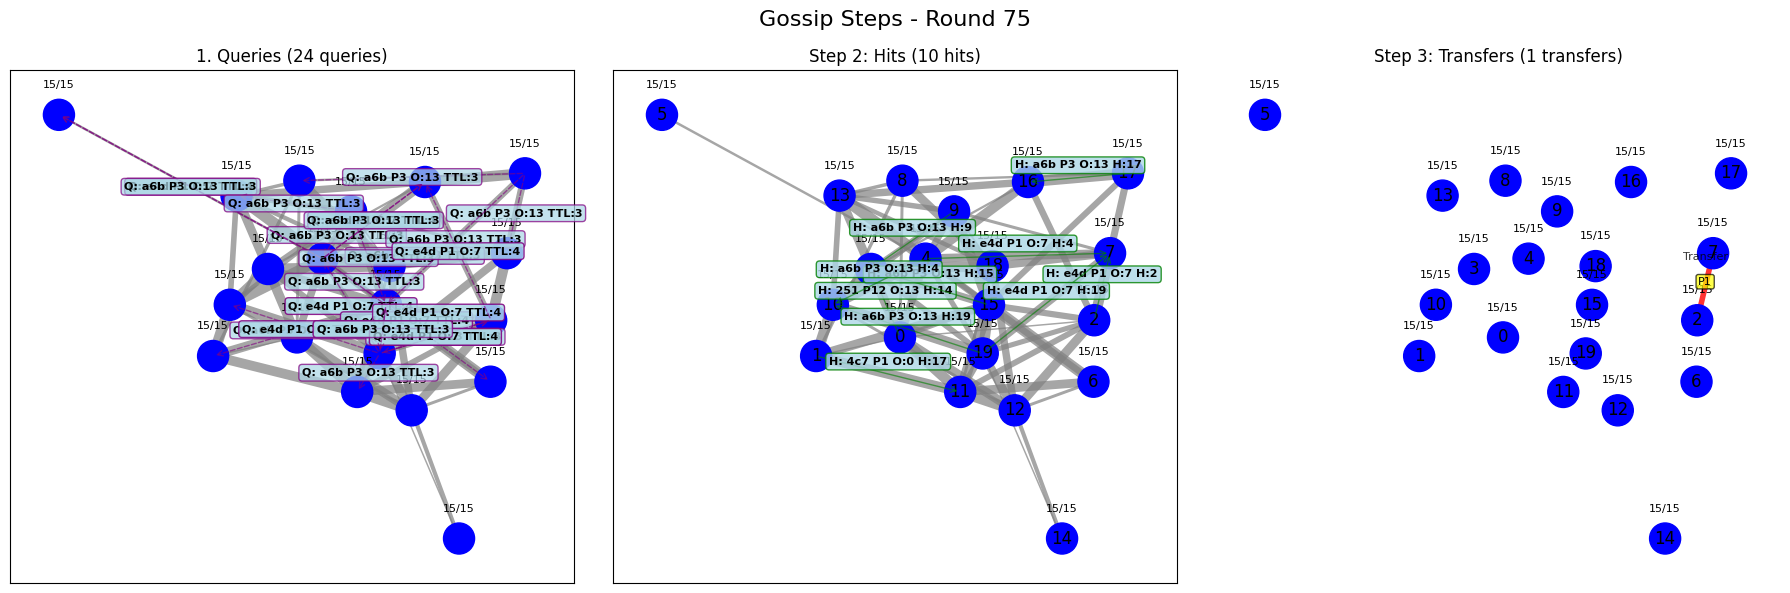

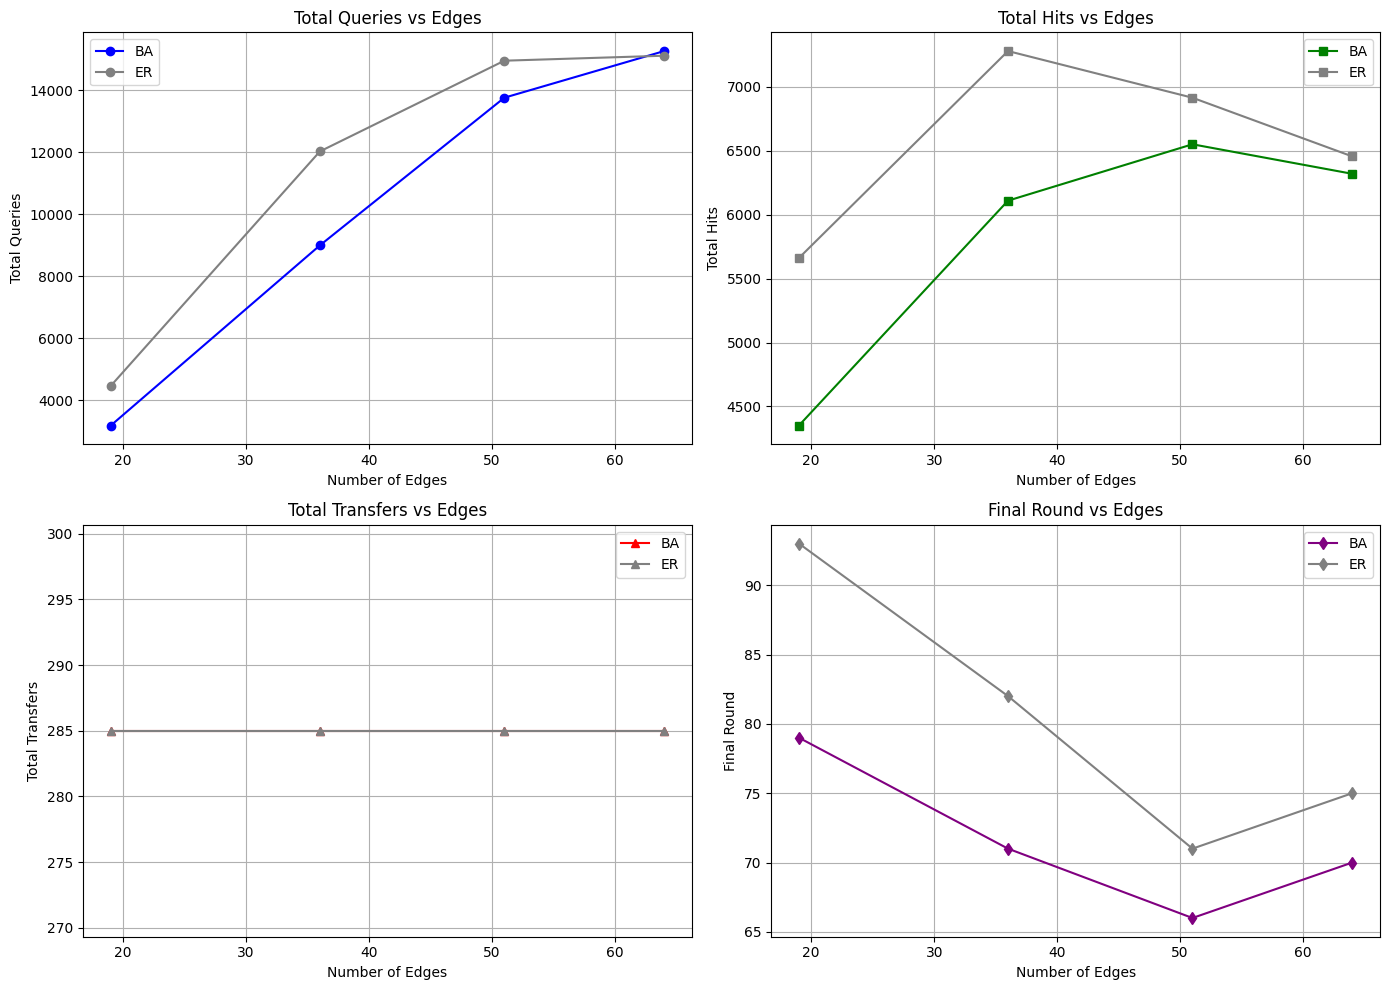

In [13]:
import matplotlib.pyplot as plt
# Scenario: Changes in agent behaviour with weighted and unweighted graphs
G = nxgraph() 

# Scenario parameters
seed             = 69
nodes            = 20
lower_ut         = 50
upper_ut         = 150
FILE_PIECES      = 15

n_seeders        = 1
sim_seed         = seed
search_mode      = 'Realistic'
neighbor_selection = 'Bandwith'
ttl              = 5
cleanup_queries  = True
single_agent     = 0
save_images      = False
visualize_output = True
output_area      = widgets.Output()

# Generating graphs
weight_test_data = {
    'BA': [],
    'ER': []
}

# Generating BA graph
for m in range(1, 5, 1):
    ba = G.BA_graph(
        nodes    = nodes,
        edges    = m,
        seed     = seed,
        weighted = True,
        lower_ut = lower_ut,
        upper_ut = upper_ut
    )

    node_count = ba.number_of_nodes()
    edge_count = ba.number_of_edges()
    avg_deg    = sum(dict(ba.degree()).values()) / node_count
    cluster    = round(clustering_co(ba), 2)
    path_L     = round(path_length(ba), 2)


    weight_test_data['BA'].append({
        'graph'                 : ba,
        'num_nodes'             : node_count,
        'num_edges'             : edge_count,
        'avg_degree'            : avg_deg,
        'clustering_coefficient': cluster,
        'average_path_length'   : path_L,
        'total_queries'         : 0,
        'total_hits'            : 0,
        'total_transfers'       : 0,
        'final_round'           : 0
    })

    print(f"\nBA_graph n={nodes}, m={m}")
    draw_graph(ba, edge_labels=None, total_pieces=FILE_PIECES)
    print(f"  | avg_deg={avg_deg:.2f}, C={cluster}, L={path_L}, edges={edge_count}")

# Generating ER graph
for ba_rec in weight_test_data['BA']:
    n       = ba_rec['num_nodes']
    avg_deg = ba_rec['avg_degree']
    m_er    = int(n * avg_deg / 2)

    er = G.ER_Graph_nm(
        nodes    = nodes,
        edges    = m_er,
        weighted = True,
        seed     = seed,
        lower_ut = lower_ut,
        upper_ut = upper_ut
    )

    node_count = er.number_of_nodes()
    edge_count = er.number_of_edges()
    cluster    = round(clustering_co(er), 2)
    path_L     = round(path_length(er), 2)

    weight_test_data['ER'].append({
        'graph'                 : er,
        'num_nodes'             : node_count,
        'num_edges'             : edge_count,
        'avg_degree'            : avg_deg,
        'clustering_coefficient': cluster,
        'average_path_length'   : path_L,
        'total_queries'         : 0,
        'total_hits'            : 0,
        'total_transfers'       : 0,
        'final_round'           : 0
    })
    print(f"\nER_graph n={nodes}, m={m_er}")
    draw_graph(er, edge_labels=None, total_pieces=FILE_PIECES)
    print(f"  | avg_deg={avg_deg:.2f}, C={cluster}, L={path_L}, edges={edge_count}")

# running simulation
for kind in ('BA', 'ER'):
    for rec in weight_test_data[kind]:
        Gk       = rec['graph']
        rec_q    = 0
        rec_h    = 0
        rec_t    = 0

        # initialise simulation
        set_graph_data(Gk, FILE_PIECES)
        agent.assign_n_seeders(Gk, n=n_seeders, seed=sim_seed)
        agent.initialize_file_sharing(
            Gk, FILE_PIECES,
            seed              = sim_seed,
            distribution_type = 'n_seeders',
            n_seeders         = n_seeders
        )
        # simulating
        r = 0
        while r <= 1000:
                result = simulate_round_agent_driven(
                Gk,
                FILE_PIECES,
                seed                    = sim_seed + r,
                cleanup_completed_queries=cleanup_queries,
                search_mode             = search_mode,
                current_round           = r,
                neighbor_selection      = neighbor_selection,
                single_agent            = (single_agent or None)
            )

                queries, hits, _ = result['message_rounds']
                transfers       = result['transfers']

                rec_q += len(queries)
                rec_h += len(hits)
                rec_t += len(transfers)
                stats = get_network_stats(Gk, FILE_PIECES)
                print(f"\n{kind} n={rec['num_nodes']} → Queries = {rec_q}, Hits = {rec_h}, Transfers = {rec_t}, Current round = {r}")
                print(f"Seeders: {stats['seeders']}")
                print(f"Leechers: {stats['leechers']} (incomplete: {stats['incomplete_leechers']})")
                print(f"Hybrids: {stats['hybrids']} (incomplete: {stats['incomplete_hybrids']})")
                print(f"Total pieces in network: {stats['total_pieces_in_network']}")
                print('about to go into stats')
                if stats['completion_rate'] >= 1.0:
                    print(f"\nAll nodes have all pieces in {r} rounds")
                    rec['final_round'] = r
                    break

                r += 1
                
        rec['total_queries']   = rec_q
        rec['total_hits']      = rec_h
        rec['total_transfers'] = rec_t

        print(f"\n{kind} n={rec['num_nodes']} → Queries = {rec_q}, Hits = {rec_h}, Transfers = {rec_t}")
        draw_gossip_step_by_step(Gk, result['message_rounds'], result['transfers'], 
                            FILE_PIECES, r, save_images=False, 
                            max_ttl=ttl, show_debug_info=False)
# result evaluations

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['total_queries', 'total_hits', 'total_transfers', 'final_round']
titles  = ['Total Queries vs Edges', 'Total Hits vs Edges',
           'Total Transfers vs Edges', 'Final Round vs Edges']
colors  = ['blue', 'green', 'red', 'purple']
markers = ['o', 's', '^', 'd']

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    ax = axs[row][col]

    for kind in ['BA', 'ER']:
        edges = [rec['num_edges'] for rec in weight_test_data[kind]]
        values = [rec[metric] for rec in weight_test_data[kind]]
        ax.plot(edges, values, marker=markers[i], label=kind, color=colors[i] if kind == 'BA' else 'gray')

    ax.set_title(titles[i])
    ax.set_xlabel('Number of Edges')
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
